# Collect Data and Data Cleaning 

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv(r"data_core.csv")

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.00,52.00,38.00,Sandy,Maize,37,0,0,Urea
1,29.00,52.00,45.00,Loamy,Sugarcane,12,0,36,DAP
2,34.00,65.00,62.00,Black,Cotton,7,9,30,14-35-14
3,32.00,62.00,34.00,Red,Tobacco,22,0,20,28-28
4,28.00,54.00,46.00,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
7995,35.30,59.61,44.25,Loamy,Oil seeds,10,14,10,Urea
7996,39.39,71.67,49.34,Black,Barley,35,0,0,10-26-26
7997,35.79,67.64,45.04,Red,Barley,41,0,0,Urea
7998,37.78,73.38,36.03,Black,Tobacco,10,3,30,DAP


### Data Column Information

In [5]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

# Eda based Questions 

### Its has Normal Distribution 

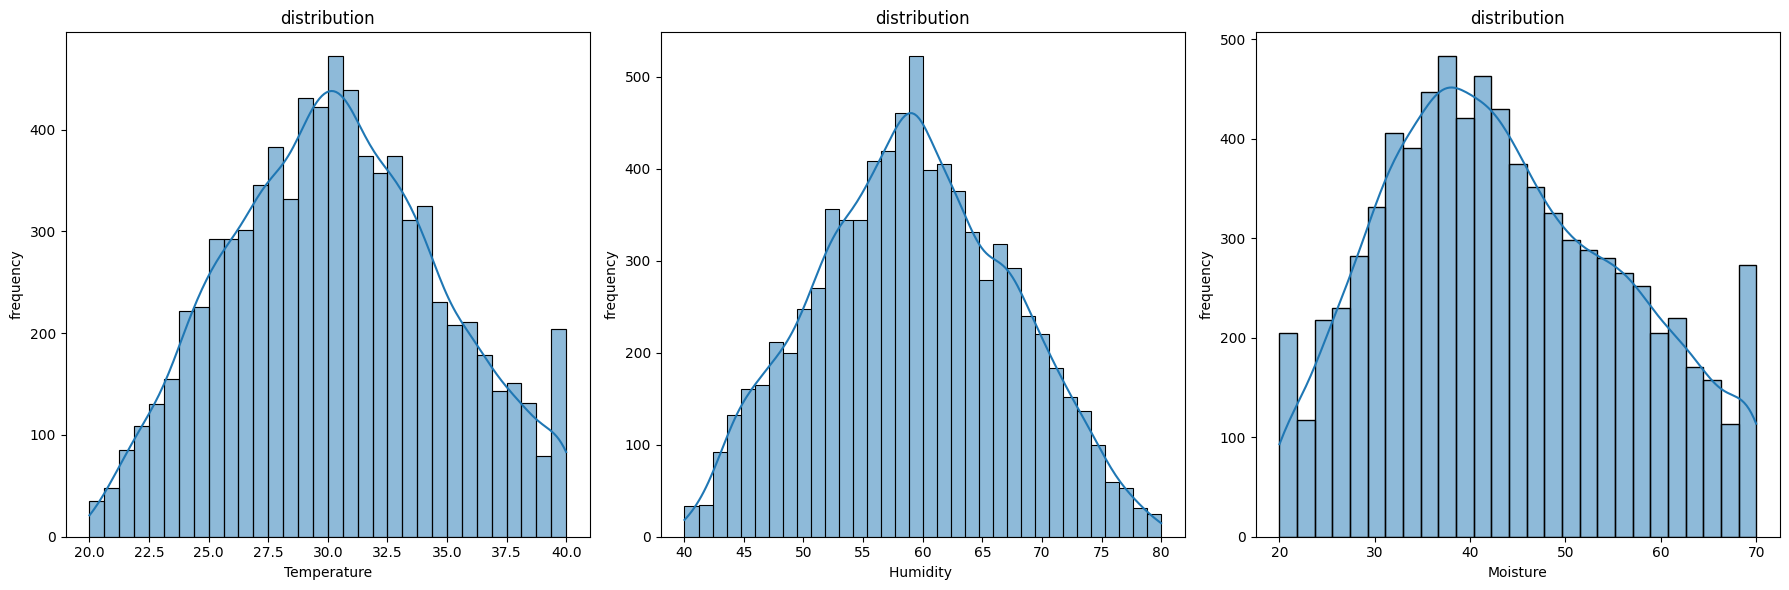

In [6]:
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
sns.histplot(df['Temparature'],kde = True)
plt.title('distribution')
plt.xlabel("Temperature")
plt.ylabel("frequency")

plt.subplot(1,3,2)
sns.histplot(df['Humidity'],kde = True)
plt.title('distribution')
plt.xlabel("Humidity ")
plt.ylabel("frequency")

plt.subplot(1,3,3)
sns.histplot(df['Moisture'],kde = True)
plt.title('distribution')
plt.xlabel("Moisture")
plt.ylabel("frequency")

plt.tight_layout()
plt.show()

In [7]:
print("Unique soil types",df['Soil Type'].unique())
print("Unique Crop type",df['Crop Type'].unique())
print("Unique Fertilizers",df['Fertilizer Name'].unique())

Unique soil types ['Sandy' 'Loamy' 'Black' 'Red' 'Clayey']
Unique Crop type ['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts']
Unique Fertilizers ['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26']


In [8]:
df['Crop Type'].value_counts()

Crop Type
Sugarcane      763
Maize          753
Wheat          747
Ground Nuts    732
Pulses         728
Cotton         722
Millets        718
Tobacco        717
Oil seeds      711
Paddy          706
Barley         703
Name: count, dtype: int64

### What is the average nitrogen, potassium, and phosphorous content for each soil type?

In [9]:
df.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [10]:
df.groupby("Soil Type")[['Nitrogen','Phosphorous','Potassium']].mean()

,Nitrogen,Phosphorous,Potassium
Soil Type,,,
Black,17.895846,18.661500,4.009299
Clayey,18.524338,18.090573,4.012939
Loamy,18.432704,18.502516,3.986164
Red,18.656211,18.822459,3.819322
Sandy,18.643038,18.491139,3.750000


### Are there any outliers in the temperature or moisture columns? 

In [11]:
df
q1 = df['Temparature'].quantile(0.25)
q2 = df['Temparature'].quantile(0.75)
iqr = q2 - q1
lower = q1 - (1.5)*iqr
upper = q2  + (1.5)*iqr
df[(df['Temparature'] <= lower)&(df['Temparature']>=upper)]
print(q1)
print(q2)
print(iqr)
print(lower)
print(upper)

27.05
33.46
6.41
17.435000000000002
43.075


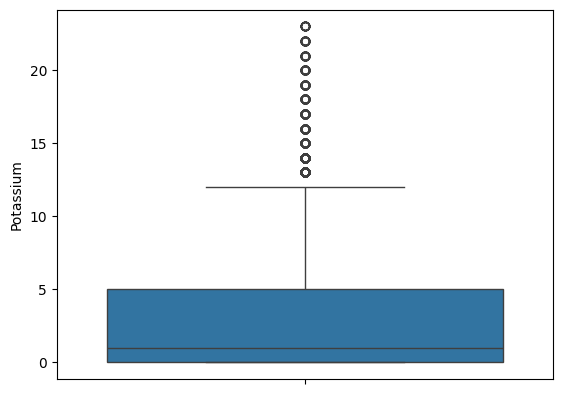

In [12]:
sns.boxplot(df['Potassium'])
plt.show()

In [86]:
df['Temparature'].describe()

count    8000.000000
mean       30.338895
std         4.478262
min        20.000000
25%        27.050000
50%        30.240000
75%        33.460000
max        40.000000
Name: Temparature, dtype: float64

In [87]:
df[(df['Temparature'] <= lower)&(df['Temparature']>=upper)]

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name


In [88]:
df
q1 = df['Moisture'].quantile(0.25)
q2 = df['Moisture'].quantile(0.75)
iqr = q2 - q1
lower = q1 - (1.5)*iqr
upper = q2  + (1.5)*iqr
print(q1)
print(q2)
print(iqr)
print(lower)
print(upper)

33.9675
52.95
18.9825
5.493749999999999
81.42375000000001


In [89]:
df[(df['Moisture'] <= lower)&(df['Moisture']>=upper)]

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name


In [90]:
df[['Temparature','Moisture']].describe()

,Temparature,Moisture
count,8000.000000,8000.000000
mean,30.338895,43.580862
std,4.478262,12.596156
min,20.000000,20.000000
25%,27.050000,33.967500
50%,30.240000,42.250000
75%,33.460000,52.950000
max,40.000000,70.000000


### How does the humidity vary across different crop types?

In [91]:
df.groupby('Crop Type')['Humidity'].describe()

,count,mean,std,min,25%,50%,75%,max
Crop Type,,,,,,,,
Barley,703.0,59.230939,8.141439,40.88,53.3100,59.280,65.3950,80.00
Cotton,722.0,58.667729,8.055912,40.79,52.8700,58.685,64.1750,80.00
Ground Nuts,732.0,59.429536,8.681613,40.44,53.4450,59.005,66.2925,79.52
Maize,753.0,59.005950,8.104950,40.33,53.1000,58.910,64.5900,79.62
Millets,718.0,58.766393,8.182250,40.17,52.6100,58.645,64.7500,79.96
Oil seeds,711.0,58.972925,8.163891,40.36,53.1300,58.750,64.5850,80.00
Paddy,706.0,59.356572,7.943920,40.70,53.8250,59.330,64.9725,80.00
Pulses,728.0,59.093310,7.972969,40.02,53.1775,59.105,64.7150,80.00
Sugarcane,763.0,59.360105,8.319623,40.23,53.0600,59.340,65.1900,80.00


C:\Users\ACER PC\AppData\Local\Temp\ipykernel_3084\1181526061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df['Crop Type'],y = df['Humidity'],palette = 'viridis')


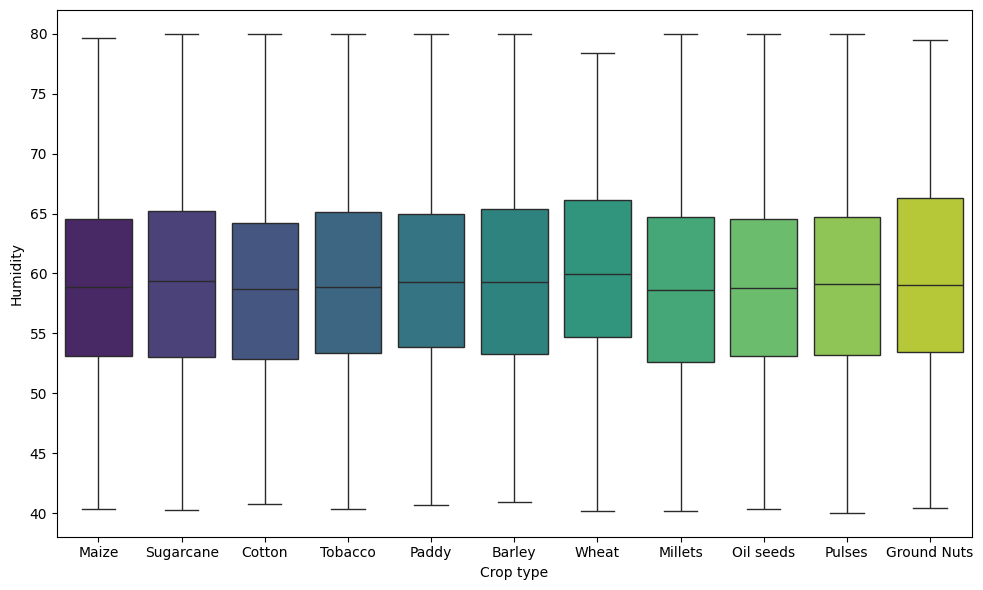

In [92]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df['Crop Type'],y = df['Humidity'],palette = 'viridis')
plt.xlabel("Crop type")
plt.ylabel("Humidity")
plt.tight_layout()
plt.show()

In [93]:
df.rename(columns = {'Temparature':"Temperature"},inplace = True)

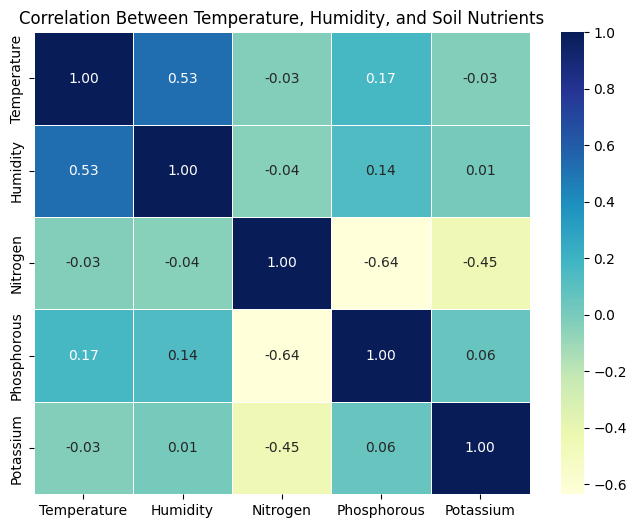

In [94]:
columns_of_interest = ['Temperature', 'Humidity', 'Nitrogen', 'Phosphorous', 'Potassium']
# Extract relevant columns
df_subset = df[columns_of_interest]
# Calculate the correlation matrix
correlation_matrix = df_subset.corr()
# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Temperature, Humidity, and Soil Nutrients')
plt.show()

In [95]:
print(correlation_matrix)

             Temperature  Humidity  Nitrogen  Phosphorous  Potassium
Temperature     1.000000  0.525594 -0.028978     0.166951  -0.031322
Humidity        0.525594  1.000000 -0.042701     0.136216   0.005695
Nitrogen       -0.028978 -0.042701  1.000000    -0.635694  -0.445762
Phosphorous     0.166951  0.136216 -0.635694     1.000000   0.056225
Potassium      -0.031322  0.005695 -0.445762     0.056225   1.000000


### Which fertilizer is used most frequently?

In [96]:
df['Fertilizer Name'].value_counts()

Fertilizer Name
14-35-14    1188
Urea        1170
DAP         1167
10-26-26    1128
17-17-17    1124
28-28       1120
20-20       1103
Name: count, dtype: int64

### What is the average temperature for each fertilizer type?

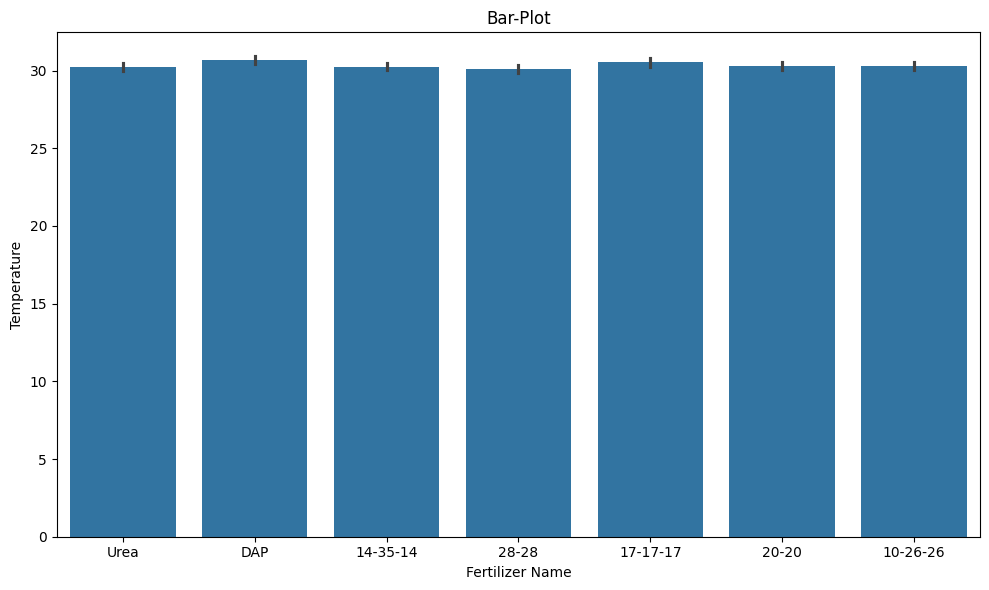

In [97]:
df.groupby('Fertilizer Name')['Temperature'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=df['Fertilizer Name'],y=df['Temperature'])
plt.title('Bar-Plot')
plt.xlabel("Fertilizer Name")
plt.ylabel("Temperature")
plt.tight_layout()
plt.show()

# Data Science 

###  Create a new feature indicating the total nutrient content (N + P + K).

In [98]:
df['Total_Content'] = df["Nitrogen"]	+ df["Potassium"]	 + df["Phosphorous"]
df

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Total_Content
0,26.00,52.00,38.00,Sandy,Maize,37,0,0,Urea,37
1,29.00,52.00,45.00,Loamy,Sugarcane,12,0,36,DAP,48
2,34.00,65.00,62.00,Black,Cotton,7,9,30,14-35-14,46
3,32.00,62.00,34.00,Red,Tobacco,22,0,20,28-28,42
4,28.00,54.00,46.00,Clayey,Paddy,35,0,0,Urea,35
...,...,...,...,...,...,...,...,...,...,...
7995,35.30,59.61,44.25,Loamy,Oil seeds,10,14,10,Urea,34
7996,39.39,71.67,49.34,Black,Barley,35,0,0,10-26-26,35
7997,35.79,67.64,45.04,Red,Barley,41,0,0,Urea,41
7998,37.78,73.38,36.03,Black,Tobacco,10,3,30,DAP,43


### Categorize temperature into "Low," "Medium," and "High."

In [99]:
df['Temperature'].describe()

count    8000.000000
mean       30.338895
std         4.478262
min        20.000000
25%        27.050000
50%        30.240000
75%        33.460000
max        40.000000
Name: Temperature, dtype: float64

In [100]:
def temp(data):
    if data<27.050000:
        return 'Low'
    elif   27.050000<=data<33.460000:
        return 'Medium'
    elif  33.460000<=data<40.0000:
        return 'High'
df['Temp_Category'] = df['Temperature'].apply(temp)
df

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Total_Content,Temp_Category
0,26.00,52.00,38.00,Sandy,Maize,37,0,0,Urea,37,Low
1,29.00,52.00,45.00,Loamy,Sugarcane,12,0,36,DAP,48,Medium
2,34.00,65.00,62.00,Black,Cotton,7,9,30,14-35-14,46,High
3,32.00,62.00,34.00,Red,Tobacco,22,0,20,28-28,42,Medium
4,28.00,54.00,46.00,Clayey,Paddy,35,0,0,Urea,35,Medium
...,...,...,...,...,...,...,...,...,...,...,...
7995,35.30,59.61,44.25,Loamy,Oil seeds,10,14,10,Urea,34,High
7996,39.39,71.67,49.34,Black,Barley,35,0,0,10-26-26,35,High
7997,35.79,67.64,45.04,Red,Barley,41,0,0,Urea,41,High
7998,37.78,73.38,36.03,Black,Tobacco,10,3,30,DAP,43,High


### Identify soil-crop pairs that require the same fertilizer.

In [101]:
Soil = df.groupby('Fertilizer Name')[['Soil Type','Crop Type']].agg(lambda x:",".join(map(str,set(x)))).reset_index()
Soil

,Fertilizer Name,Soil Type,Crop Type
0,10-26-26,"Clayey,Black,Sandy,Red,Loamy","Cotton,Paddy,Maize,Sugarcane,Wheat,Pulses,Grou..."
1,14-35-14,"Black,Sandy,Red,Clayey,Loamy","Cotton,Paddy,Maize,Sugarcane,Wheat,Pulses,Grou..."
2,17-17-17,"Black,Sandy,Red,Clayey,Loamy","Cotton,Paddy,Maize,Sugarcane,Wheat,Pulses,Grou..."
3,20-20,"Black,Sandy,Red,Clayey,Loamy","Cotton,Paddy,Maize,Sugarcane,Pulses,Wheat,Grou..."
4,28-28,"Black,Sandy,Red,Clayey,Loamy","Cotton,Paddy,Maize,Sugarcane,Wheat,Pulses,Grou..."
5,DAP,"Clayey,Black,Sandy,Red,Loamy","Cotton,Barley,Paddy,Maize,Sugarcane,Pulses,Whe..."
6,Urea,"Clayey,Black,Sandy,Red,Loamy","Cotton,Barley,Paddy,Maize,Sugarcane,Wheat,Puls..."


In [102]:
# Group by soil type, crop type, and fertilizer
soil_crop_fertilizer = df.groupby(['Soil Type', 'Crop Type'])['Fertilizer Name'].unique().reset_index()

# Find soil-crop pairs with the same fertilizer
common_fertilizers = soil_crop_fertilizer.explode('Fertilizer Name')

# Identify duplicate fertilizers across soil-crop pairs
shared_fertilizers = common_fertilizers.groupby('Fertilizer Name').filter(lambda x: len(x) > 1)
(shared_fertilizers)


,Soil Type,Crop Type,Fertilizer Name
0,Black,Barley,17-17-17
0,Black,Barley,14-35-14
0,Black,Barley,Urea
0,Black,Barley,DAP
0,Black,Barley,28-28
...,...,...,...
54,Sandy,Wheat,DAP
54,Sandy,Wheat,20-20
54,Sandy,Wheat,14-35-14
54,Sandy,Wheat,Urea


### Create a binary column indicating if nitrogen is above the average.

In [103]:
df['Nitrogen'].describe()

count    8000.000000
mean       18.429125
std        11.852406
min         0.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        46.000000
Name: Nitrogen, dtype: float64

In [104]:
def binary(data):
    if data>18.429125:
        return True
    else:
        return False
df['Nitrogen_Above_Average'] = df['Nitrogen'].apply(binary)

### Which soil type tends to hold the most moisture?

In [105]:
df_soil = df.groupby("Soil Type")['Moisture'].mean().reset_index()
df_soil = df_soil.sort_values(by = 'Moisture',ascending = False)
df_soil

,Soil Type,Moisture
4,Sandy,43.954475
1,Clayey,43.890185
0,Black,43.417526
3,Red,43.408030
2,Loamy,43.232824


### Identify the top 3 crop types by average moisture level.

In [106]:
df_crop = df.groupby("Crop Type")['Moisture'].mean().reset_index()
df_crop = df_crop.sort_values(by='Moisture', ascending=False).head(3)
df_crop

,Crop Type,Moisture
3,Maize,44.526348
9,Tobacco,44.259582
5,Oil seeds,43.859761


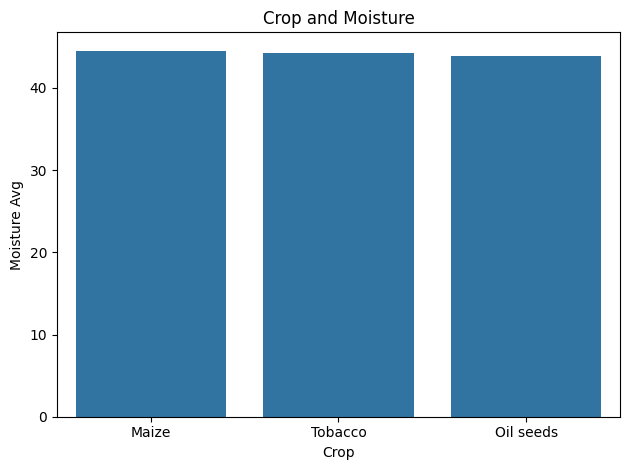

In [107]:
sns.barplot(x = df_crop['Crop Type'],y = df_crop['Moisture'])
plt.title("Crop and Moisture")
plt.xlabel("Crop")
plt.ylabel("Moisture Avg")
plt.tight_layout()
plt.show()

### Which fertilizer is most suitable for loamy soil?

In [108]:
df_best = df[df['Soil Type'] == 'Loamy']['Fertilizer Name'].value_counts().head(1)
df_best

Fertilizer Name
Urea    235
Name: count, dtype: int64

### Create a moisture-to-humidity ratio feature.

In [109]:
df['M/H'] = df['Moisture']/df['Humidity']
df

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Total_Content,Temp_Category,Nitrogen_Above_Average,M/H
0,26.00,52.00,38.00,Sandy,Maize,37,0,0,Urea,37,Low,True,0.730769
1,29.00,52.00,45.00,Loamy,Sugarcane,12,0,36,DAP,48,Medium,False,0.865385
2,34.00,65.00,62.00,Black,Cotton,7,9,30,14-35-14,46,High,False,0.953846
3,32.00,62.00,34.00,Red,Tobacco,22,0,20,28-28,42,Medium,True,0.548387
4,28.00,54.00,46.00,Clayey,Paddy,35,0,0,Urea,35,Medium,True,0.851852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,35.30,59.61,44.25,Loamy,Oil seeds,10,14,10,Urea,34,High,False,0.742325
7996,39.39,71.67,49.34,Black,Barley,35,0,0,10-26-26,35,High,True,0.688433
7997,35.79,67.64,45.04,Red,Barley,41,0,0,Urea,41,High,True,0.665878
7998,37.78,73.38,36.03,Black,Tobacco,10,3,30,DAP,43,High,False,0.491006


### Can we group similar crops based on their nutrient requirements?  


Cluster 0:
['Maize', 'Paddy', 'Wheat']

Cluster 1:
['Sugarcane', 'Cotton', 'Oil seeds', 'Pulses', 'Ground Nuts']

Cluster 2:
['Tobacco', 'Barley', 'Millets']


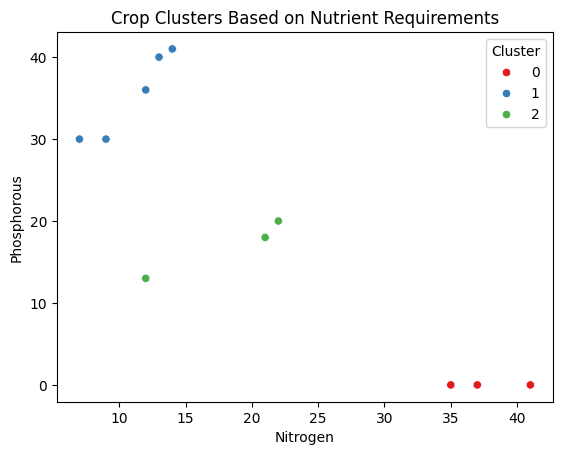

In [110]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant nutrient features
nutrient_data = df[['Crop Type', 'Nitrogen', 'Phosphorous', 'Potassium']]

# Drop duplicate crop entries to get unique nutrient requirements
nutrient_data = nutrient_data.drop_duplicates('Crop Type').reset_index(drop=True)

# Apply K-Means Clustering (3 clusters as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
nutrient_data['Cluster'] = kmeans.fit_predict(nutrient_data[['Nitrogen', 'Phosphorous', 'Potassium']])

# Display grouped crops by cluster
for cluster in nutrient_data['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    print(nutrient_data[nutrient_data['Cluster'] == cluster]['Crop Type'].tolist())

# Visualize the clusters
sns.scatterplot(x='Nitrogen', y='Phosphorous', hue='Cluster', data=nutrient_data, palette='Set1')
plt.title('Crop Clusters Based on Nutrient Requirements')
plt.show()


#### Applying the Kmean clustering

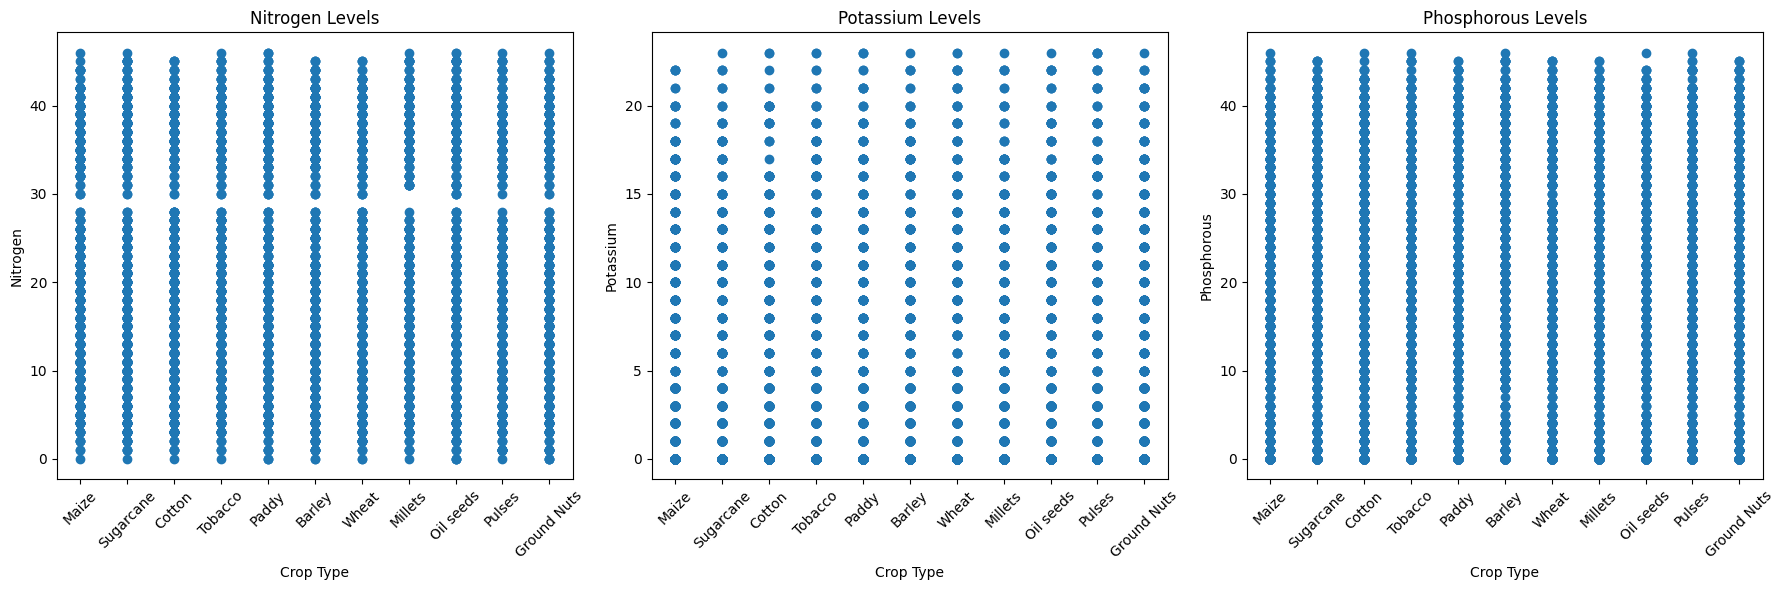

In [111]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns, larger figure size

# First subplot (Nitrogen)
axs[0].scatter(df['Crop Type'], df['Nitrogen'])
axs[0].set_title('Nitrogen Levels')
axs[0].set_xlabel('Crop Type')
axs[0].set_ylabel('Nitrogen')
axs[0].tick_params(axis='x', rotation=45)

# Second subplot (Potassium)
axs[1].scatter(df['Crop Type'], df['Potassium'])
axs[1].set_title('Potassium Levels')
axs[1].set_xlabel('Crop Type')
axs[1].set_ylabel('Potassium')
axs[1].tick_params(axis='x', rotation=45)

# Third subplot (Phosphorous)
axs[2].scatter(df['Crop Type'], df['Phosphorous'])
axs[2].set_title('Phosphorous Levels')
axs[2].set_xlabel('Crop Type')
axs[2].set_ylabel('Phosphorous')
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()


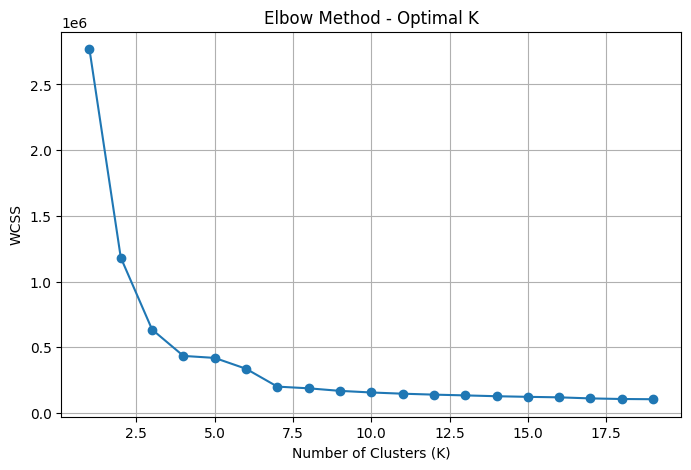

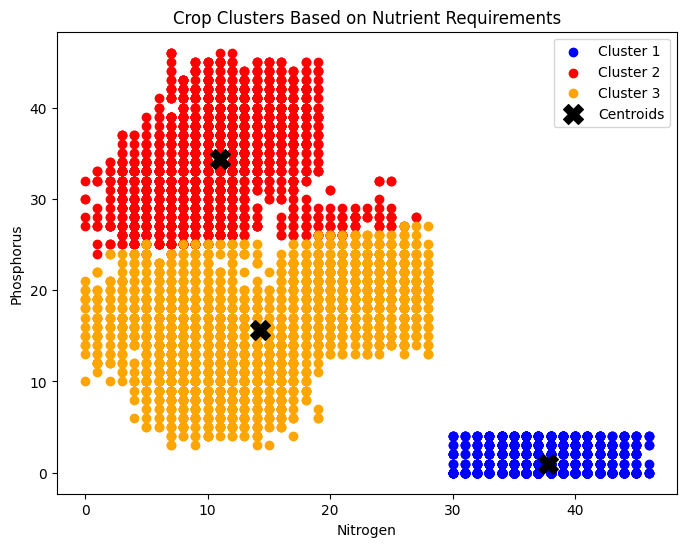


Cluster 1:
['Maize' 'Paddy' 'Wheat' 'Cotton' 'Pulses' 'Millets' 'Sugarcane'
 'Ground Nuts' 'Oil seeds' 'Tobacco' 'Barley']

Cluster 2:
['Sugarcane' 'Cotton' 'Oil seeds' 'Pulses' 'Ground Nuts' 'Wheat' 'Tobacco'
 'Barley' 'Paddy' 'Millets' 'Maize']

Cluster 3:
['Tobacco' 'Barley' 'Cotton' 'Millets' 'Maize' 'Paddy' 'Sugarcane'
 'Pulses' 'Ground Nuts' 'Wheat' 'Oil seeds']


In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select relevant columns for clustering
df1 = df[['Nitrogen', 'Phosphorous', 'Potassium']]

# 1. Finding Optimal K using the Elbow Method
wcss = []
for i in range(1, 20):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df1)  # Use fit() for WCSS calculation
    wcss.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 2. Apply K-Means Clustering (let's assume K=3 for now)
km = KMeans(n_clusters=3, random_state=42)
y_means = km.fit_predict(df1)

# 3. Visualizing the Clusters
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'orange']

for i in range(3):
    plt.scatter(df1.values[y_means == i, 0], df1.values[y_means == i, 1], 
                color=colors[i], label=f'Cluster {i+1}')

# Plotting the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            s=200, color='black', marker='X', label='Centroids')

plt.title('Crop Clusters Based on Nutrient Requirements')
plt.xlabel('Nitrogen')
plt.ylabel('Phosphorus')
plt.legend()
plt.show()

# 4. Assign cluster labels back to the original DataFrame
df['Cluster'] = y_means

# View grouped crops by cluster
for cluster in range(3):
    print(f"\nCluster {cluster + 1}:")
    print(df[df['Cluster'] == cluster]['Crop Type'].unique())


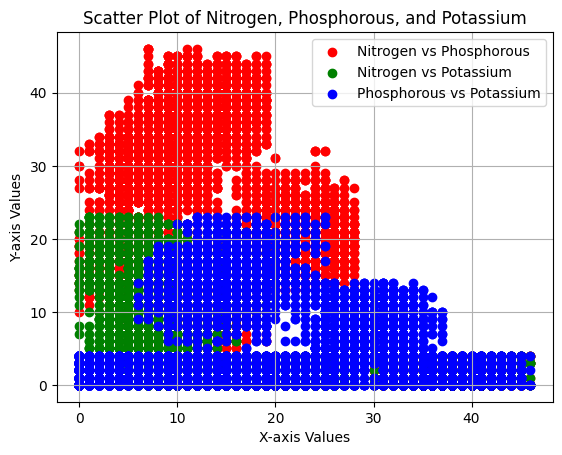

In [113]:
from sklearn.cluster import KMeans
df1 = df[['Nitrogen', 'Potassium', 'Phosphorous']]
plt.scatter(df1['Nitrogen'], df1['Phosphorous'], color='r', label='Nitrogen vs Phosphorous')
plt.scatter(df1['Nitrogen'], df1['Potassium'], color='g', label='Nitrogen vs Potassium')
plt.scatter(df1['Phosphorous'], df1['Potassium'], color='b', label='Phosphorous vs Potassium')

plt.xlabel('X-axis Values')
plt.ylabel('Y-axis Values')
plt.title('Scatter Plot of Nitrogen, Phosphorous, and Potassium')
plt.legend()
plt.grid(True)
plt.show()

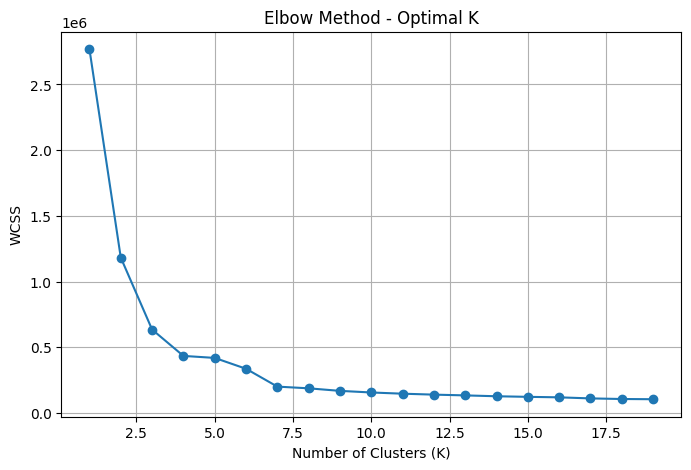

In [114]:
wcss = []
for i in range(1, 20):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df1)  # Use fit() for WCSS calculation
    wcss.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)

### Identify optimal temperature and moisture ranges for each crop.               

In [115]:

optimal_ranges = df.groupby('Crop Type').agg({
    'Temperature': ['min', 'max', 'mean'],
    'Moisture': ['min', 'max', 'mean']
}).reset_index()

# Rename columns for clarity
optimal_ranges.columns = ['Crop Type', 'Min_Temperature', 'Max_Temperature', 'Avg_Temperature',
                          'Min_Moisture', 'Max_Moisture', 'Avg_Moisture']
(optimal_ranges)


,Crop Type,Min_Temperature,Max_Temperature,Avg_Temperature,Min_Moisture,Max_Moisture,Avg_Moisture
0,Barley,20.00,40.0,30.198009,20.0,70.0,43.483514
1,Cotton,20.27,40.0,30.348906,20.0,70.0,43.648989
2,Ground Nuts,20.14,40.0,30.471189,20.0,70.0,42.852254
3,Maize,20.18,40.0,30.324157,20.0,70.0,44.526348
4,Millets,20.26,40.0,30.287716,20.0,70.0,43.792813
5,Oil seeds,20.05,40.0,30.334107,20.0,70.0,43.859761
6,Paddy,20.41,40.0,30.328924,20.0,70.0,42.951686
7,Pulses,20.09,40.0,30.198104,20.0,70.0,43.016113
8,Sugarcane,20.03,40.0,30.485033,20.0,70.0,43.548938
9,Tobacco,20.18,40.0,30.138661,20.0,70.0,44.259582


### Calculate the average nutrient balance for each crop

# Advanced dataset 

### Which crops are most sensitive to temperature fluctuations?

In [116]:
df.groupby("Crop Type")['Temperature'].describe()

,count,mean,std,min,25%,50%,75%,max
Crop Type,,,,,,,,
Barley,703.0,30.198009,4.379935,20.00,26.7950,30.180,32.9750,40.0
Cotton,722.0,30.348906,4.599281,20.27,27.1325,30.090,33.6025,40.0
Ground Nuts,732.0,30.471189,4.476588,20.14,27.2800,30.295,33.6500,40.0
Maize,753.0,30.324157,4.448308,20.18,27.0300,30.310,33.2300,40.0
Millets,718.0,30.287716,4.410623,20.26,27.2100,30.110,33.2775,40.0
Oil seeds,711.0,30.334107,4.475693,20.05,26.9150,30.280,33.5500,40.0
Paddy,706.0,30.328924,4.543571,20.41,27.1025,30.230,33.4650,40.0
Pulses,728.0,30.198104,4.535249,20.09,26.8575,30.280,33.3200,40.0
Sugarcane,763.0,30.485033,4.509073,20.03,27.0250,30.440,33.7150,40.0


In [117]:
crop = df.groupby("Crop Type")['Temperature'].std().reset_index().head(3)

In [118]:
crop

,Crop Type,Temperature
0,Barley,4.379935
1,Cotton,4.599281
2,Ground Nuts,4.476588


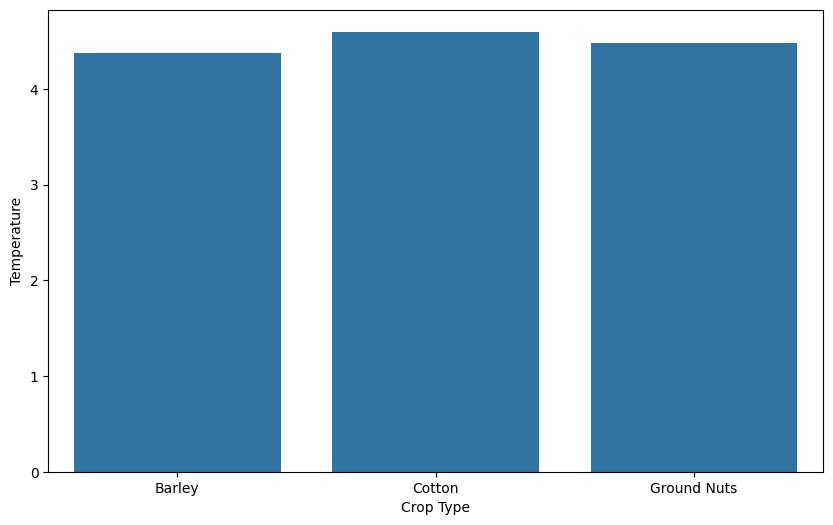

In [119]:
plt.figure(figsize = (10,6))
sns.barplot(x= crop['Crop Type'],y = crop['Temperature'])
plt.xlabel("Crop Type")
plt.ylabel("Temperature")
plt.show()

###  Which fertilizer is most frequently used across different crop types?

In [120]:
df.columns

Index(['Temperature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'Total_Content', 'Temp_Category', 'Nitrogen_Above_Average', 'M/H',
       'Cluster'],
      dtype='object')

In [121]:
fertilizer = df.groupby("Fertilizer Name")['Crop Type'].nunique().reset_index()
fertilizer

,Fertilizer Name,Crop Type
0,10-26-26,11
1,14-35-14,11
2,17-17-17,11
3,20-20,11
4,28-28,11
5,DAP,11
6,Urea,11


In [122]:
ratio = df.groupby('Crop Type')['Total_Content'].mean()
ratio

Crop Type
Barley         40.859175
Cotton         40.862881
Ground Nuts    41.030055
Maize          40.826029
Millets        40.484680
Oil seeds      40.434599
Paddy          41.126062
Pulses         40.920330
Sugarcane      40.888598
Tobacco        41.149233
Wheat          40.852744
Name: Total_Content, dtype: float64

## What is the average nitrogen-phosphorus-potassium (N-P-K) ratio for each crop?

### Create an index representing soil fertility based on nutrient composition.

In [123]:
df.columns

Index(['Temperature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'Total_Content', 'Temp_Category', 'Nitrogen_Above_Average', 'M/H',
       'Cluster'],
      dtype='object')

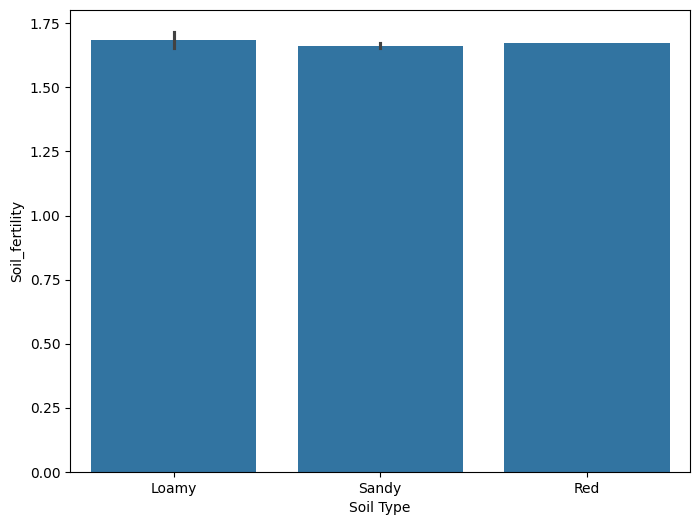

In [124]:
df['N_fertility'] = df['Nitrogen']/df['Nitrogen'].max()
df['Po_fertility'] = df['Potassium']/df['Potassium'].max()
df['Ph_fertility'] = df['Phosphorous']/df['Phosphorous'].max()
df['Soil_fertility'] = df['N_fertility'] + df['Po_fertility'] + df['Ph_fertility']
soil = df.sort_values(by = 'Soil_fertility',ascending = False).head(5)
plt.figure(figsize = (8,6))
sns.barplot(x = soil['Soil Type'],y = soil['Soil_fertility'])
plt.show()

In [125]:
soil

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Total_Content,Temp_Category,Nitrogen_Above_Average,M/H,Cluster,N_fertility,Po_fertility,Ph_fertility,Soil_fertility
6046,34.68,75.20,45.71,Loamy,Tobacco,15,21,22,20-20,58,High,False,0.607846,2,0.326087,0.913043,0.478261,1.717391
4852,26.96,53.75,21.67,Sandy,Ground Nuts,17,21,18,Urea,56,Low,False,0.403163,2,0.369565,0.913043,0.391304,1.673913
2901,29.02,55.34,29.32,Red,Wheat,17,21,18,20-20,56,Medium,False,0.529816,2,0.369565,0.913043,0.391304,1.673913
7747,32.91,58.24,59.48,Sandy,Barley,10,22,22,10-26-26,54,Medium,False,1.021291,2,0.217391,0.956522,0.478261,1.652174
6799,29.91,71.44,52.85,Loamy,Millets,5,23,25,Urea,53,Medium,False,0.739782,2,0.108696,1.000000,0.543478,1.652174


### Design a crop diversity score by grouping similar crops by nutrient needs.

In [126]:
df1 = df[["Temperature"	,"Humidity","Moisture","Soil Type","Crop Type","Nitrogen","Potassium","Phosphorous","Fertilizer Name","Total_Content"]]

In [127]:
df1

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Total_Content
0,26.00,52.00,38.00,Sandy,Maize,37,0,0,Urea,37
1,29.00,52.00,45.00,Loamy,Sugarcane,12,0,36,DAP,48
2,34.00,65.00,62.00,Black,Cotton,7,9,30,14-35-14,46
3,32.00,62.00,34.00,Red,Tobacco,22,0,20,28-28,42
4,28.00,54.00,46.00,Clayey,Paddy,35,0,0,Urea,35
...,...,...,...,...,...,...,...,...,...,...
7995,35.30,59.61,44.25,Loamy,Oil seeds,10,14,10,Urea,34
7996,39.39,71.67,49.34,Black,Barley,35,0,0,10-26-26,35
7997,35.79,67.64,45.04,Red,Barley,41,0,0,Urea,41
7998,37.78,73.38,36.03,Black,Tobacco,10,3,30,DAP,43


In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select nutrient features
nutrient_features = ['Nitrogen', 'Phosphorous', 'Potassium']

# Normalize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[nutrient_features])

# Apply K-Means clustering (3 groups for diversity analysis)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Nutrient_Cluster'] = kmeans.fit_predict(df_scaled)
(df[['Crop Type', 'Nutrient_Cluster']].head())


,Crop Type,Nutrient_Cluster
0,Maize,0
1,Sugarcane,1
2,Cotton,2
3,Tobacco,1
4,Paddy,0


In [129]:
# Diversity score = Number of unique clusters per soil type
diversity_score = df.groupby('Soil Type')['Nutrient_Cluster'].nunique().reset_index()
diversity_score.columns = ['Soil Type', 'Crop Diversity Score']

print(diversity_score.sort_values(by='Crop Diversity Score', ascending=False))


  Soil Type  Crop Diversity Score
0     Black                     3
1    Clayey                     3
2     Loamy                     3
3       Red                     3
4     Sandy                     3


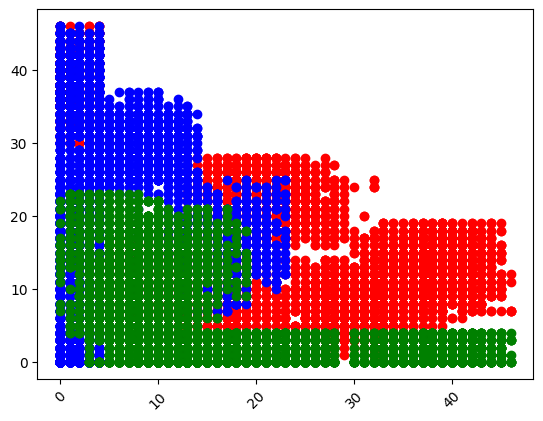

In [130]:
plt.scatter(df['Phosphorous'],df['Nitrogen'],color= 'red')
plt.scatter(df['Potassium'],df['Phosphorous'],color = 'blue')
plt.scatter(df['Nitrogen'],df['Potassium'],color = 'green')
plt.xticks(rotation = 45)
plt.show()

### Identify seasonal crop patterns based on temperature and moisture levels.

In [132]:
df[['Temperature','Moisture']].describe()

,Temperature,Moisture
count,8000.000000,8000.000000
mean,30.338895,43.580862
std,4.478262,12.596156
min,20.000000,20.000000
25%,27.050000,33.967500
50%,30.240000,42.250000
75%,33.460000,52.950000
max,40.000000,70.000000


In [134]:
df['temp_category'] = pd.cut(df['Temperature'],bins = [0,27,33,40],labels = ['cool','moderate','warm'])
df['moist_category'] = pd.cut(df['Moisture'],bins = [0,34,52,70],labels = ['Low','Medium','High'])
df

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Total_Content,...,Nitrogen_Above_Average,M/H,Cluster,N_fertility,Po_fertility,Ph_fertility,Soil_fertility,Nutrient_Cluster,temp_category,moist_category
0,26.00,52.00,38.00,Sandy,Maize,37,0,0,Urea,37,...,True,0.730769,0,0.804348,0.000000,0.000000,0.804348,0,cool,Medium
1,29.00,52.00,45.00,Loamy,Sugarcane,12,0,36,DAP,48,...,False,0.865385,1,0.260870,0.000000,0.782609,1.043478,1,moderate,Medium
2,34.00,65.00,62.00,Black,Cotton,7,9,30,14-35-14,46,...,False,0.953846,1,0.152174,0.391304,0.652174,1.195652,2,warm,High
3,32.00,62.00,34.00,Red,Tobacco,22,0,20,28-28,42,...,True,0.548387,2,0.478261,0.000000,0.434783,0.913043,1,moderate,Low
4,28.00,54.00,46.00,Clayey,Paddy,35,0,0,Urea,35,...,True,0.851852,0,0.760870,0.000000,0.000000,0.760870,0,moderate,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,35.30,59.61,44.25,Loamy,Oil seeds,10,14,10,Urea,34,...,False,0.742325,2,0.217391,0.608696,0.217391,1.043478,2,warm,Medium
7996,39.39,71.67,49.34,Black,Barley,35,0,0,10-26-26,35,...,True,0.688433,0,0.760870,0.000000,0.000000,0.760870,0,warm,Medium
7997,35.79,67.64,45.04,Red,Barley,41,0,0,Urea,41,...,True,0.665878,0,0.891304,0.000000,0.000000,0.891304,0,warm,Medium
7998,37.78,73.38,36.03,Black,Tobacco,10,3,30,DAP,43,...,False,0.491006,1,0.217391,0.130435,0.652174,1.000000,1,warm,Medium


In [138]:
df.groupby(['temp_category','moist_category'])['Crop Type'].value_counts()

C:\Users\ACER PC\AppData\Local\Temp\ipykernel_3084\1285431230.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['temp_category','moist_category'])['Crop Type'].value_counts()


temp_category  moist_category  Crop Type  
cool           Low             Sugarcane      63
                               Ground Nuts    61
                               Cotton         54
                               Maize          54
                               Oil seeds      53
                                              ..
warm           High            Cotton         59
                               Millets        57
                               Paddy          55
                               Pulses         51
                               Barley         47
Name: count, Length: 99, dtype: int64

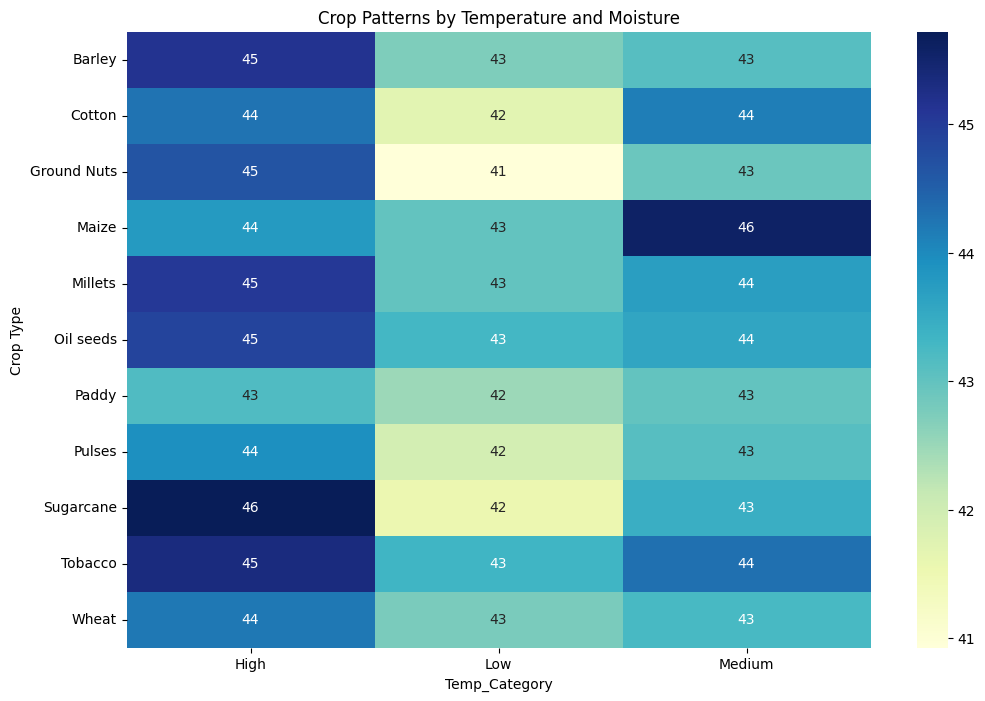

In [139]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.pivot_table(index='Crop Type', columns='Temp_Category', values='Moisture', aggfunc='mean'), cmap='YlGnBu', annot=True)
plt.title('Crop Patterns by Temperature and Moisture')
plt.show()


###  Create a new feature indicating the best soil type for each fertilizer.

In [140]:
df1

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Total_Content
0,26.00,52.00,38.00,Sandy,Maize,37,0,0,Urea,37
1,29.00,52.00,45.00,Loamy,Sugarcane,12,0,36,DAP,48
2,34.00,65.00,62.00,Black,Cotton,7,9,30,14-35-14,46
3,32.00,62.00,34.00,Red,Tobacco,22,0,20,28-28,42
4,28.00,54.00,46.00,Clayey,Paddy,35,0,0,Urea,35
...,...,...,...,...,...,...,...,...,...,...
7995,35.30,59.61,44.25,Loamy,Oil seeds,10,14,10,Urea,34
7996,39.39,71.67,49.34,Black,Barley,35,0,0,10-26-26,35
7997,35.79,67.64,45.04,Red,Barley,41,0,0,Urea,41
7998,37.78,73.38,36.03,Black,Tobacco,10,3,30,DAP,43


In [141]:
# Determine the most common soil type for each fertilizer
optimal_soil = df1.groupby('Fertilizer Name')['Soil Type'].agg(lambda x: x.mode()[0]).reset_index()
optimal_soil.columns = ['Fertilizer Name', 'Optimal Soil Type']

# Merge with original dataset
df1 = pd.merge(df1, optimal_soil, on='Fertilizer Name', how='left')

# Display sample output
print(df1[['Fertilizer Name', 'Optimal Soil Type']].drop_duplicates())


   Fertilizer Name Optimal Soil Type
0             Urea             Black
1              DAP               Red
2         14-35-14            Clayey
3            28-28             Black
5         17-17-17             Loamy
6            20-20            Clayey
63        10-26-26            Clayey


In [142]:
df1

,Temperature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Total_Content,Optimal Soil Type
0,26.00,52.00,38.00,Sandy,Maize,37,0,0,Urea,37,Black
1,29.00,52.00,45.00,Loamy,Sugarcane,12,0,36,DAP,48,Red
2,34.00,65.00,62.00,Black,Cotton,7,9,30,14-35-14,46,Clayey
3,32.00,62.00,34.00,Red,Tobacco,22,0,20,28-28,42,Black
4,28.00,54.00,46.00,Clayey,Paddy,35,0,0,Urea,35,Black
...,...,...,...,...,...,...,...,...,...,...,...
7995,35.30,59.61,44.25,Loamy,Oil seeds,10,14,10,Urea,34,Black
7996,39.39,71.67,49.34,Black,Barley,35,0,0,10-26-26,35,Clayey
7997,35.79,67.64,45.04,Red,Barley,41,0,0,Urea,41,Black
7998,37.78,73.38,36.03,Black,Tobacco,10,3,30,DAP,43,Red


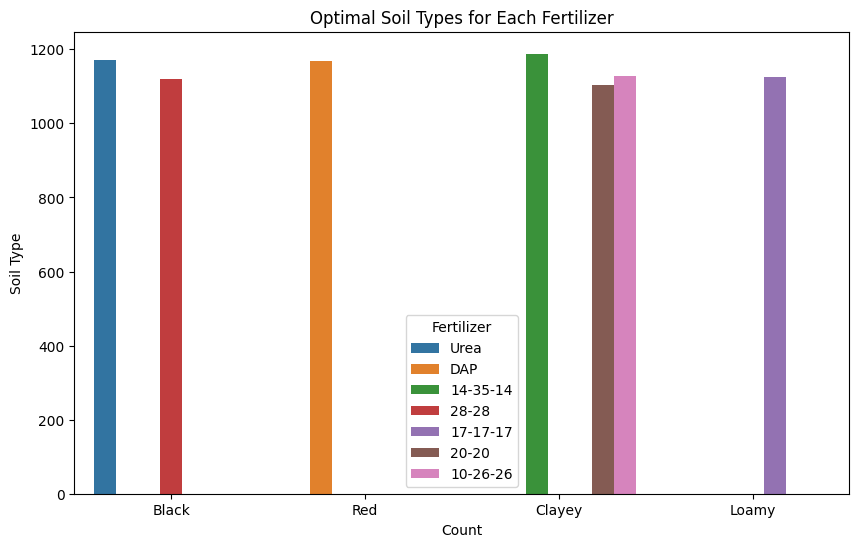

In [145]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Optimal Soil Type', hue='Fertilizer Name', data=df1)
plt.title('Optimal Soil Types for Each Fertilizer')
plt.xlabel('Count')
plt.ylabel('Soil Type')
plt.legend(title='Fertilizer')
plt.show()


In [151]:
df1.columns

Index(['Temperature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'Total_Content', 'Optimal Soil Type'],
      dtype='object')

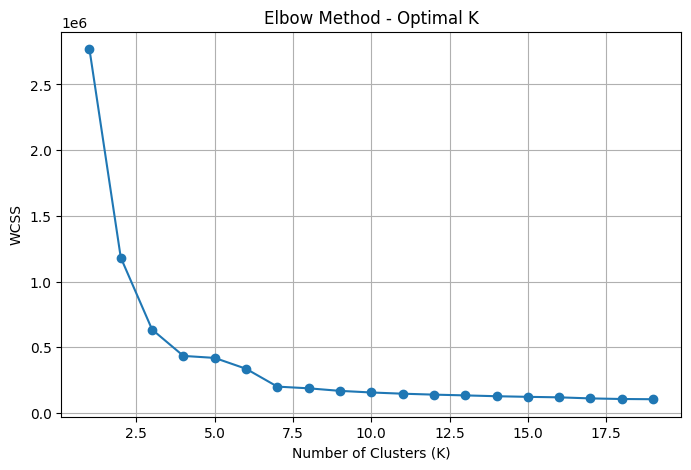

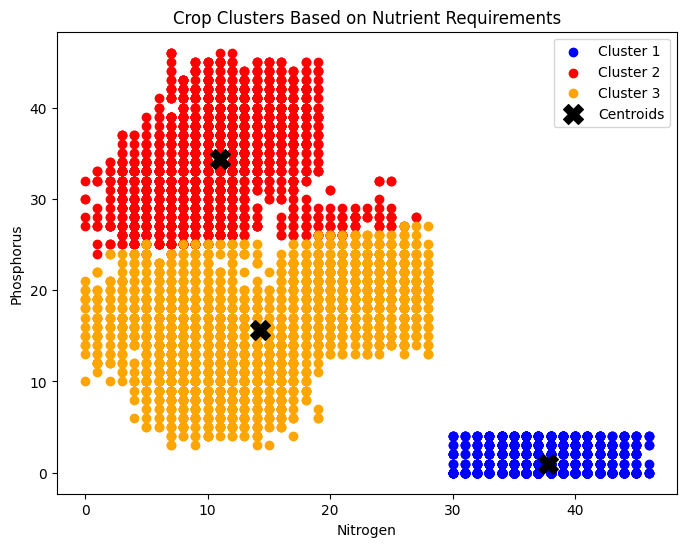


Cluster 1:
['Maize' 'Paddy' 'Wheat' 'Cotton' 'Pulses' 'Millets' 'Sugarcane'
 'Ground Nuts' 'Oil seeds' 'Tobacco' 'Barley']

Cluster 2:
['Sugarcane' 'Cotton' 'Oil seeds' 'Pulses' 'Ground Nuts' 'Wheat' 'Tobacco'
 'Barley' 'Paddy' 'Millets' 'Maize']

Cluster 3:
['Tobacco' 'Barley' 'Cotton' 'Millets' 'Maize' 'Paddy' 'Sugarcane'
 'Pulses' 'Ground Nuts' 'Wheat' 'Oil seeds']


In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select relevant columns for clustering
df1 = df[['Nitrogen', 'Phosphorous', 'Potassium']]

# 1. Finding Optimal K using the Elbow Method
wcss = []
for i in range(1, 20):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df1)  # Use fit() for WCSS calculation
    wcss.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 2. Apply K-Means Clustering (let's assume K=3 for now)
km = KMeans(n_clusters=3, random_state=42)
y_means = km.fit_predict(df1)

# 3. Visualizing the Clusters
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'orange']

for i in range(3):
    plt.scatter(df1.values[y_means == i, 0], df1.values[y_means == i, 1], 
                color=colors[i], label=f'Cluster {i+1}')

# Plotting the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            s=200, color='black', marker='X', label='Centroids')

plt.title('Crop Clusters Based on Nutrient Requirements')
plt.xlabel('Nitrogen')
plt.ylabel('Phosphorus')
plt.legend()
plt.show()

# 4. Assign cluster labels back to the original DataFrame
df['Cluster'] = y_means

# View grouped crops by cluster
for cluster in range(3):
    print(f"\nCluster {cluster + 1}:")
    print(df[df['Cluster'] == cluster]['Crop Type'].unique())


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('data_core.csv')

# Select nutrient features for clustering
nutrient_features = ['Nitrogen', 'Phosphorous', 'Potassium']

# Normalize the nutrient data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[nutrient_features])

# Find optimal clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means with the chosen K (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Nutrient_Cluster'] = kmeans.fit_predict(df_scaled)

# Inspect cluster membership
print(df[['Crop Type', 'Nutrient_Cluster']].groupby('Nutrient_Cluster')['Crop Type'].unique())
